In [160]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [161]:
description = pd.read_csv('steamdataset/steam_description_data.csv')
media_data = pd.read_csv('steamdataset/steam_media_data.csv')
requirements_data = pd.read_csv('steamdataset/steam_requirements_data.csv')
support_info = pd.read_csv('steamdataset/steam_support_info.csv')
steam = pd.read_csv('steamdataset/steam.csv')
steam_tag_data = pd.read_csv('steamdataset/steamspy_tag_data.csv')

In [162]:
steam.sample(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
18383,745420,Tronix Defender,2017-11-13,1,SHOKIZM INTERACTIVE,SHOKIZM INTERACTIVE,windows,0,Single-player,Casual;Indie;Strategy,Casual;Indie;Strategy,0,2,2,0,0,0-20000,3.99
17356,713840,Goblin Storm,2017-12-19,1,Nemeton Singularity Simulations,Nemeton Singularity Simulations,windows,0,Single-player;Multi-player;Online Multi-Player...,Indie;Strategy,Strategy;Indie,15,4,2,0,0,0-20000,15.49
23288,888630,Another Sight,2018-09-06,1,Lunar Great Wall Studios,Fish Eagle,windows,0,Single-player;Steam Achievements;Full controll...,Action;Adventure;Indie,Adventure;Indie;Action,21,69,9,0,0,0-20000,15.99
8123,443890,BUCK: Saturday Morning Cartoon Apocalypse,2017-03-17,1,Wave Interactive,Wave Interactive,windows,0,Single-player;Steam Trading Cards;Partial Cont...,Action;Adventure;Indie;RPG;Early Access,Early Access;Adventure;Indie,0,46,7,0,0,0-20000,6.99
11660,546900,Fear Effect Sedna,2018-03-06,1,Sushee,Square Enix;Forever Entertainment S. A.,windows,16,Single-player;Steam Achievements;Full controll...,Action;Strategy,Action;Strategy;Indie,24,40,46,0,0,0-20000,15.99


appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64


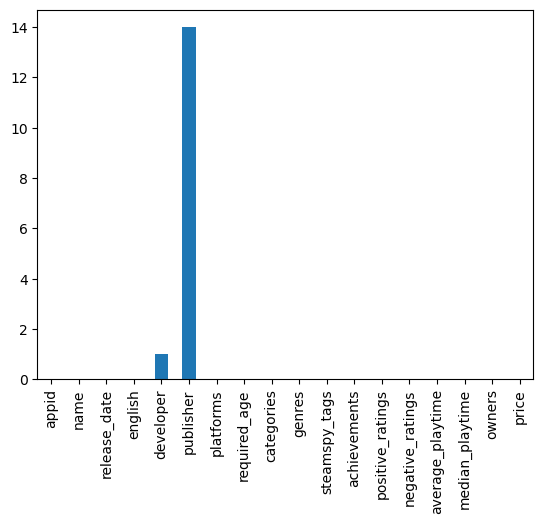

In [163]:
steam_na = steam.isna().sum()
print(steam_na)
steam_na.plot(kind='bar')
plt.show()


In [164]:
# since the number of missing values is small relativ to the dataset , im gonna drop those lines
original_df = steam.dropna() # steam.fillna('Missing')
original_df.isna().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [165]:
df = original_df.copy()
df['p_n_rating_ratio'] = np.where(df['negative_ratings'] == 0, np.nan, df['positive_ratings'] / df['negative_ratings']).round(2)
df.head(5)


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,p_n_rating_ratio
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,37.30
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,5.24
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,8.58
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,4.77
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,18.23


In [166]:
(df['price'] == 0).any()

True

In [167]:
def categorize_based_onprice(price):
    if price == 0 :
        return 'Free'
    else :
        return 'Paid'
df['price_category'] = df['price'].apply(categorize_based_onprice)


In [168]:
# take a look on the others data
media_data.sample(3)


,steam_appid,header_image,screenshots,background,movies
15371,659220,https://steamcdn-a.akamaihd.net/steam/apps/659...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/659...,NaN
15774,670160,https://steamcdn-a.akamaihd.net/steam/apps/670...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/670...,"[{'id': 256692018, 'name': ""D'LIRIUM Gameplay ..."
24076,912370,https://steamcdn-a.akamaihd.net/steam/apps/912...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/912...,"[{'id': 256726892, 'name': 'new first release ..."


In [169]:
description.sample(3)

,steam_appid,detailed_description,about_the_game,short_description
24504,928390,"The coin-op classics, R-Type &amp; R-Type II, ...","The coin-op classics, R-Type &amp; R-Type II, ...","R-Type and R-Type II, the legendary coin-op sp..."
1406,214150,Galactic Civilizations is a space based strate...,Galactic Civilizations is a space based strate...,Galactic Civilizations is a space based strate...
582,32140,"The master of macabre, Edgar Allan Poe, leads ...","The master of macabre, Edgar Allan Poe, leads ...","The master of macabre, Edgar Allan Poe, leads ..."


In [170]:
steam_media_data = pd.merge(df,media_data,left_on='appid', right_on='steam_appid',how='left').drop(columns=['steam_appid'])
final_merged_df = pd.merge(steam_media_data,description,left_on='appid', right_on='steam_appid',how='left').drop(columns=['steam_appid'])
final_merged_df.sample(3).T

,19095,3240,5086
appid,765160,301200,355810
name,Weable 2,Frederic: Evil Strikes Back,Centauri Sector
release_date,2018-02-05,2014-05-23,2015-06-23
english,1,1,1
developer,SPECTRUM GAMES,Forever Entertainment S. A.,LW Games
publisher,SPECTRUM GAMES,Forever Entertainment S. A.,LW Games
platforms,windows,windows;mac;linux,windows;mac;linux
required_age,0,0,0
categories,Single-player,Single-player;Steam Achievements;Steam Trading...,Single-player;Steam Achievements;Steam Trading...
genres,Action;Casual;Indie,Action;Casual;Indie,Action;Indie;Strategy


 The Game : My Little Worms is Paid and has the following PNR-Ratio 2.5  


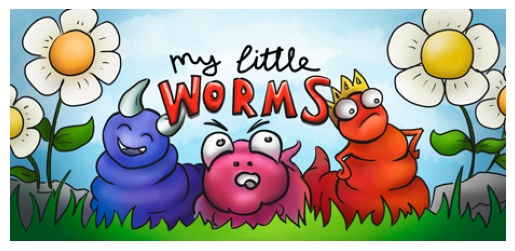

 The Game : Disney Infinity 2.0: Gold Edition is Paid and has the following PNR-Ratio 8.33  


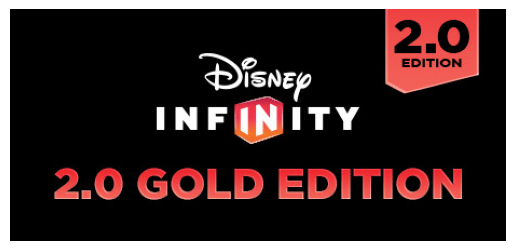

 The Game : Incursion The Thing is Paid and has the following PNR-Ratio 0.75  


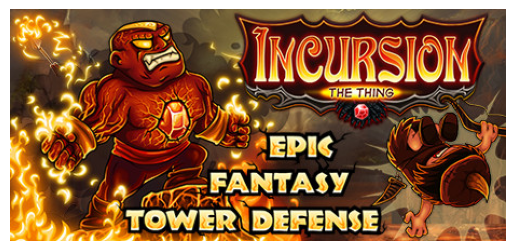

 The Game : Iron Warriors: T - 72 Tank Command  is Paid and has the following PNR-Ratio 1.34  


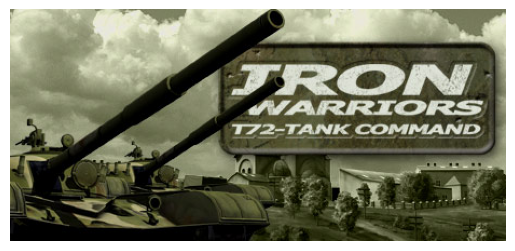

 The Game : Coach Bus Simulator Parking is Paid and has the following PNR-Ratio 0.0  


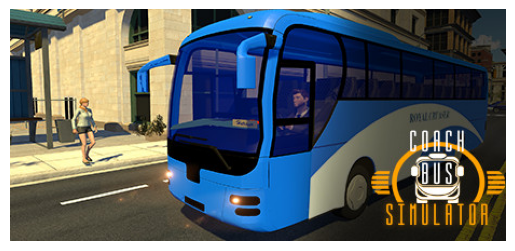

In [171]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
for index, row in final_merged_df.sample(5).iterrows():
    print(f" The Game : {row['name']} is {row['price_category']} and has the following PNR-Ratio {row['p_n_rating_ratio']}  ")
    response = requests.get(row['header_image'])
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

In [172]:
#https://huggingface.co/WhereIsAI/UAE-Large-V1
from angle_emb import AnglE, Prompts
from sklearn.metrics.pairwise import cosine_distances
angle = AnglE.from_pretrained('WhereIsAI/UAE-Large-V1', pooling_strategy='cls').cuda()
doc_vecs = angle.encode([
    'The weather is great!',
    'The weather is very good!',
    'i am going to bed'
], normalize_embedding=True)
cosine_distances(doc_vecs)

array([[0.        , 0.04937881, 0.6565592 ],
       [0.04937881, 0.        , 0.650071  ],
       [0.6565592 , 0.650071  , 0.        ]], dtype=float32)

In [173]:
description_embedding = angle.encode(final_merged_df['short_description'].to_list()[:100])
description_embedding.shape

(100, 1024)

In [174]:
# I need to remove the HTML tags from the description as they may impact the embeddings
from bs4 import BeautifulSoup
def clean_html(text):
    if pd.notnull(text):  
        return BeautifulSoup(text, 'html.parser').get_text()
    return text

final_merged_df['detailed_description'] = final_merged_df['detailed_description'].apply(clean_html)
final_merged_df.tail(5).T


/tmp/ipykernel_51038/2628605041.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


,27056,27057,27058,27059,27060
appid,1065230,1065570,1065650,1066700,1069460
name,Room of Pandora,Cyber Gun,Super Star Blast,New Yankee 7: Deer Hunters,Rune Lord
release_date,2019-04-24,2019-04-23,2019-04-24,2019-04-17,2019-04-24
english,1,1,1,1,1
developer,SHEN JIAWEI,Semyon Maximov,EntwicklerX,Yustas Game Studio,Adept Studios GD
publisher,SHEN JIAWEI,BekkerDev Studio,EntwicklerX,Alawar Entertainment,Alawar Entertainment
platforms,windows,windows,windows,windows;mac,windows;mac
required_age,0,0,0,0,0
categories,Single-player;Steam Achievements,Single-player,Single-player;Multi-player;Co-op;Shared/Split ...,Single-player;Steam Cloud,Single-player;Steam Cloud
genres,Adventure;Casual;Indie,Action;Adventure;Indie,Action;Casual;Indie,Adventure;Casual;Indie,Adventure;Casual;Indie


In [175]:
# im gonna take only the first 1000 based on postive negative ratio and num of owners
own_description = []
for idx,row in final_merged_df.iterrows():
    des = f"Game name : {row['name']} Developer {row['genres']} Summary : {row['detailed_description']} "
    own_description.append(des)
final_merged_df['own_description'] = own_description
final_merged_df.sample(3)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,p_n_rating_ratio,price_category,header_image,screenshots,background,movies,detailed_description,about_the_game,short_description,own_description
6294,388050,Snik,2015-09-04,1,Cleverweek,Cleverweek,windows;mac;linux,0,Single-player;Steam Trading Cards;Stats,Casual;Indie,...,1.49,Paid,https://steamcdn-a.akamaihd.net/steam/apps/388...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/388...,"[{'id': 256655971, 'name': 'Snik', 'thumbnail'...",Snik is an extremely hard game that will test ...,Snik is an extremely hard game that will test ...,Snik is an extremely hard game that will test ...,Game name : Snik Developer Casual;Indie Summar...
19819,786330,Internal Storm,2018-03-28,1,CaveBrave,CaveBrave,windows;mac;linux,0,Single-player;Steam Achievements,Casual;Indie;RPG,...,NaN,Paid,https://steamcdn-a.akamaihd.net/steam/apps/786...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/786...,"[{'id': 256709853, 'name': 'Internal Storm', '...",This game let you dive into the nostalgia atmo...,This game let you dive into the nostalgia atmo...,This game let you dive into the nostalgia atmo...,Game name : Internal Storm Developer Casual;In...
8903,464040,Log Drive Runner,2016-09-08,1,Proud Camel Games,Proud Camel Games,windows,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie,...,7.50,Paid,https://steamcdn-a.akamaihd.net/steam/apps/464...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/464...,"[{'id': 256665539, 'name': 'Log Drive Runner T...",Log Drive Runner - a both relaxing and super-h...,<strong><br>Log Drive Runner - a both relaxing...,"A both relaxing and super-hectic game, a new v...",Game name : Log Drive Runner Developer Casual;...


In [176]:
final_merged_df['min_owners'] = final_merged_df['owners'].apply(lambda n : int(n.split('-')[0]))
final_merged_df.sample(3).T

,6657,8310,11121
appid,397870,448530,531540
name,Arcane Sorcery,Square's Route,Hidden Dimensions 3
release_date,2015-09-15,2016-03-18,2016-10-12
english,1,1,1
developer,Andrew Rowe,Black Death Apps Limited,Stijn Van Cauter
publisher,Andrew Rowe,Green Man Gaming Publishing,Stijn Van Cauter
platforms,windows;mac,windows;mac,windows
required_age,0,0,0
categories,Single-player;Steam Trading Cards;Captions ava...,Single-player,Single-player
genres,Indie;Strategy,Indie,Strategy


In [177]:
df = final_merged_df.sort_values(['min_owners','p_n_rating_ratio'],ascending=[False,False]).iloc[:1000]
df.sample(3)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,price_category,header_image,screenshots,background,movies,detailed_description,about_the_game,short_description,own_description,min_owners
6292,387990,Scrap Mechanic,2016-01-19,1,Axolot Games,Axolot Games,windows,0,Single-player;Multi-player;Co-op;Steam Worksho...,Action;Adventure;Indie;Simulation;Early Access,...,Paid,https://steamcdn-a.akamaihd.net/steam/apps/387...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/387...,"[{'id': 256659038, 'name': 'Scrap Mechanic - C...",PLEASE NOTE: We’re still at work on Scrap Mech...,PLEASE NOTE: We’re still at work on Scrap Mech...,Welcome to the machine-filled creative paradis...,Game name : Scrap Mechanic Developer Action;Ad...,500000
1813,242640,Styx: Master of Shadows,2014-10-07,1,Cyanide Studio,Focus Home Interactive,windows,0,Single-player;Steam Achievements;Full controll...,Action,...,Paid,https://steamcdn-a.akamaihd.net/steam/apps/242...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/242...,"[{'id': 2034896, 'name': 'Styx: Master of Shad...",BuzzAbout the GameStyx: Master of Shadows is a...,<strong>Styx: Master of Shadows</strong> is an...,Styx: Master of Shadows is an infiltration gam...,Game name : Styx: Master of Shadows Developer ...,500000
11,280,Half-Life: Source,2004-06-01,1,Valve,Valve,windows;mac;linux,0,Single-player,Action,...,Free,https://steamcdn-a.akamaihd.net/steam/apps/280...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/280...,NaN,"Winner of over 50 Game of the Year awards, Hal...","Winner of over 50 Game of the Year awards, Hal...","Winner of over 50 Game of the Year awards, Hal...",Game name : Half-Life: Source Developer Action...,2000000


In [178]:
df.to_csv('games_dataset.csv',index=False)

In [179]:
df['own_description'].iloc[0]

"Game name : Dota 2 Developer Action;Free to Play;Strategy Summary : The most-played game on Steam.Every day, millions of players worldwide enter battle as one of over a hundred Dota heroes. And no matter if it's their 10th hour of play or 1,000th, there's always something new to discover. With regular updates that ensure a constant evolution of gameplay, features, and heroes, Dota 2 has truly taken on a life of its own.One Battlefield. Infinite Possibilities.When it comes to diversity of heroes, abilities, and powerful items, Dota boasts an endless array—no two games are the same. Any hero can fill multiple roles, and there's an abundance of items to help meet the needs of each game. Dota doesn't provide limitations on how to play, it empowers you to express your own style.All heroes are free.Competitive balance is Dota's crown jewel, and to ensure everyone is playing on an even field, the core content of the game—like the vast pool of heroes—is available to all players. Fans can coll

In [180]:
batches = np.array_split(df['own_description'],50)
embs = []
for index,chunk in enumerate(batches):
    print(f"{index} /{len(batches)}")
    embs+= list(angle.encode(list(chunk),to_numpy=True))
    
embs

/home/basheppo/anaconda3/envs/badr_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


0 /50
1 /50
2 /50
3 /50
4 /50
5 /50
6 /50
7 /50
8 /50
9 /50
10 /50
11 /50
12 /50
13 /50
14 /50
15 /50
16 /50
17 /50
18 /50
19 /50
20 /50
21 /50
22 /50
23 /50
24 /50
25 /50
26 /50
27 /50
28 /50
29 /50
30 /50
31 /50
32 /50
33 /50
34 /50
35 /50
36 /50
37 /50
38 /50
39 /50
40 /50
41 /50
42 /50
43 /50
44 /50
45 /50
46 /50
47 /50
48 /50
49 /50


[array([-0.22951744,  0.58372337, -0.44713852, ..., -0.13024245,
        -0.5841446 , -0.08106409], dtype=float32),
 array([-0.2368222 ,  0.33354628, -0.53209907, ..., -0.43901363,
        -0.7710132 , -0.08894142], dtype=float32),
 array([ 0.07501645, -0.04648224, -1.0076524 , ...,  0.40983364,
        -0.32858208, -0.14467534], dtype=float32),
 array([ 0.3740081 ,  0.23591323, -0.7328936 , ...,  0.06667129,
        -0.2949266 , -0.21232887], dtype=float32),
 array([-0.08392613,  0.36166304, -0.40562782, ...,  0.302865  ,
         0.02364924, -0.03827479], dtype=float32),
 array([ 0.46075487,  0.40085346, -0.81367683, ...,  0.23263626,
        -0.06314594, -0.04828376], dtype=float32),
 array([ 0.13307862,  0.5008913 , -0.43488166, ..., -0.94316876,
        -0.15345906, -0.38086084], dtype=float32),
 array([-0.00844502,  0.3509566 , -0.5967606 , ..., -0.6304704 ,
        -0.27047688, -0.16768326], dtype=float32),
 array([ 0.2254834 ,  0.64747083, -0.82207966, ..., -0.3475926 ,
       

In [181]:
len(embs)

1000

In [185]:

embs_array = np.array(embs)

print(embs_array[0].tolist())



[-0.22951744496822357, 0.5837233662605286, -0.4471385180950165, 0.1887662410736084, 0.43589869141578674, -0.9576794505119324, -0.10521362721920013, 0.02866491489112377, -0.11614032834768295, 0.4749891757965088, 0.5084938406944275, -0.36457422375679016, 1.086181879043579, -0.5275251269340515, -0.19365186989307404, 0.1954832673072815, -0.7195481657981873, -0.82013338804245, -0.4014689326286316, -0.6771013140678406, 0.11917253583669662, 0.8227897882461548, -0.9910014271736145, -0.8225532174110413, 0.06629534065723419, 0.24206337332725525, 0.24123802781105042, -0.14674344658851624, 0.9102118015289307, 0.2528124153614044, 0.48973873257637024, 0.027485987171530724, 0.43135589361190796, 0.04461986571550369, -0.3759402334690094, -0.08416412770748138, 0.15616145730018616, -0.2506563067436218, -0.39044561982154846, -1.0556093454360962, 0.6492528915405273, -1.6316090822219849, 1.326930046081543, -0.4272964596748352, -0.7225635647773743, 0.2768952548503876, 0.3387922942638397, -0.7974362969398499,

In [186]:
df = df.reset_index(drop=True)  

In [188]:
embs_df = pd.DataFrame(columns=['appid','embedding'])
for index,row in df.iterrows():
    embs_df.loc[index] = [row['appid'],embs_array[index].tolist()]
    
embs_df.head(10)

,appid,embedding
0,570,"[-0.22951744496822357, 0.5837233662605286, -0...."
1,730,"[-0.2368222028017044, 0.3335462808609009, -0.5..."
2,578080,"[0.07501645386219025, -0.04648223891854286, -1..."
3,440,"[0.37400808930397034, 0.2359132319688797, -0.7..."
4,230410,"[-0.08392613381147385, 0.3616630434989929, -0...."
5,304930,"[0.4607548713684082, 0.4008534550666809, -0.81..."
6,620,"[0.13307861983776093, 0.5008913278579712, -0.4..."
7,400,"[-0.008445020765066147, 0.35095658898353577, -..."
8,10,"[0.22548340260982513, 0.6474708318710327, -0.8..."
9,550,"[0.31777411699295044, -0.18552543222904205, -0..."


In [189]:
embs_df.to_csv('embeddings.csv',index=False)

In [190]:
embs_df['embedding'].iloc[0]

[-0.22951744496822357,
 0.5837233662605286,
 -0.4471385180950165,
 0.1887662410736084,
 0.43589869141578674,
 -0.9576794505119324,
 -0.10521362721920013,
 0.02866491489112377,
 -0.11614032834768295,
 0.4749891757965088,
 0.5084938406944275,
 -0.36457422375679016,
 1.086181879043579,
 -0.5275251269340515,
 -0.19365186989307404,
 0.1954832673072815,
 -0.7195481657981873,
 -0.82013338804245,
 -0.4014689326286316,
 -0.6771013140678406,
 0.11917253583669662,
 0.8227897882461548,
 -0.9910014271736145,
 -0.8225532174110413,
 0.06629534065723419,
 0.24206337332725525,
 0.24123802781105042,
 -0.14674344658851624,
 0.9102118015289307,
 0.2528124153614044,
 0.48973873257637024,
 0.027485987171530724,
 0.43135589361190796,
 0.04461986571550369,
 -0.3759402334690094,
 -0.08416412770748138,
 0.15616145730018616,
 -0.2506563067436218,
 -0.39044561982154846,
 -1.0556093454360962,
 0.6492528915405273,
 -1.6316090822219849,
 1.326930046081543,
 -0.4272964596748352,
 -0.7225635647773743,
 0.2768952548503

In [194]:
game_name = 'Deathmatch Classic'
game_id = df[df['name']==game_name]['appid'].item()
game_emb = embs_df[embs_df['appid']==game_id]['embedding'].item()
game_emb

[0.4552989602088928,
 0.03786703944206238,
 0.15728633105754852,
 0.9570523500442505,
 0.07152047008275986,
 -0.3533085882663727,
 -0.48440122604370117,
 -0.40920382738113403,
 -0.18551529943943024,
 0.763579249382019,
 -0.4993278384208679,
 0.8365973830223083,
 0.7802278995513916,
 0.08599522709846497,
 0.19315044581890106,
 0.25113219022750854,
 0.11486908048391342,
 -0.646530032157898,
 -0.3511918783187866,
 0.1517220288515091,
 0.6731353998184204,
 0.43963250517845154,
 -1.2330925464630127,
 -0.3852103054523468,
 -0.08812003582715988,
 0.3526128828525543,
 0.36662817001342773,
 -0.18406495451927185,
 0.45747438073158264,
 0.3467285931110382,
 0.5061052441596985,
 -0.5415045022964478,
 0.44802477955818176,
 -0.3203853666782379,
 -0.5498137474060059,
 -0.7942528128623962,
 0.7985550761222839,
 -0.8743301033973694,
 -0.07185281813144684,
 -0.23601344227790833,
 0.5191428065299988,
 -1.0123133659362793,
 0.7334228754043579,
 -0.8725411295890808,
 -0.8728541135787964,
 0.109501168131828

In [203]:
print(embs_array.shape)

(1000, 1024)


In [204]:
game_emb = np.array(game_emb)

In [205]:
game_emb = game_emb.reshape(1,1024)
game_emb.shape

(1, 1024)

In [206]:
distances = cosine_distances(game_emb,embs_array)


In [207]:
min_distances_idx = distances.argsort()
min_distances_idx.shape

(1, 1000)

In [208]:
distances = distances.reshape(1000)
distances[min_distances_idx.reshape(1000)]

array([0.        , 0.25775814, 0.27921372, 0.30305928, 0.31754359,
       0.33844158, 0.34438215, 0.35014255, 0.35064342, 0.35124791,
       0.35138307, 0.35197004, 0.35370016, 0.361777  , 0.36235669,
       0.36242851, 0.36264476, 0.36278604, 0.36458515, 0.36746196,
       0.36838209, 0.37133136, 0.37142204, 0.37506717, 0.37535422,
       0.37561064, 0.37582224, 0.3760018 , 0.37819593, 0.37896705,
       0.37944924, 0.38167864, 0.38253844, 0.38272167, 0.38301904,
       0.38316648, 0.38590269, 0.38695398, 0.38728276, 0.38751995,
       0.38774598, 0.38796965, 0.38886661, 0.38892091, 0.38898671,
       0.38917664, 0.3906656 , 0.39150615, 0.39292486, 0.39296141,
       0.39427346, 0.39433483, 0.39546698, 0.39632096, 0.39787989,
       0.39861407, 0.39892239, 0.39907542, 0.39935914, 0.40040082,
       0.40103104, 0.40212737, 0.40262123, 0.40283916, 0.40293597,
       0.40296543, 0.40350818, 0.40477492, 0.4057813 , 0.4061246 ,
       0.40615888, 0.40624424, 0.40651155, 0.40671369, 0.40703

In [209]:
# joining the two dfs 
ready_df = pd.merge(df,embs_df,left_on='appid',right_on='appid',how='left')
ready_df.head(5)
    
    

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,header_image,screenshots,background,movies,detailed_description,about_the_game,short_description,own_description,min_owners,embedding
0,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,...,https://steamcdn-a.akamaihd.net/steam/apps/570...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/570...,"[{'id': 256692021, 'name': 'Dota 2 - Join the ...","The most-played game on Steam.Every day, milli...",<strong>The most-played game on Steam.</strong...,"Every day, millions of players worldwide enter...",Game name : Dota 2 Developer Action;Free to Pl...,100000000,"[-0.22951744496822357, 0.5837233662605286, -0...."
1,730,Counter-Strike: Global Offensive,2012-08-21,1,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,...,https://steamcdn-a.akamaihd.net/steam/apps/730...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/730...,"[{'id': 81958, 'name': 'CS:GO Trailer Long', '...",Counter-Strike: Global Offensive (CS: GO) expa...,Counter-Strike: Global Offensive (CS: GO) expa...,Counter-Strike: Global Offensive (CS: GO) expa...,Game name : Counter-Strike: Global Offensive D...,50000000,"[-0.2368222028017044, 0.3335462808609009, -0.5..."
2,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,...,https://steamcdn-a.akamaihd.net/steam/apps/578...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/578...,"[{'id': 256737984, 'name': 'Vikendi CGI Traile...",PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,<strong>PLAYERUNKNOWN'S BATTLEGROUNDS</strong>...,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,Game name : PLAYERUNKNOWN'S BATTLEGROUNDS Deve...,50000000,"[0.07501645386219025, -0.04648223891854286, -1..."
3,440,Team Fortress 2,2007-10-10,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,...,https://steamcdn-a.akamaihd.net/steam/apps/440...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/440...,"[{'id': 256698790, 'name': 'Jungle Inferno', '...",The Jungle Inferno UpdatePlay the all-new Jung...,"<p><strong>""The most fun you can have online""<...",Nine distinct classes provide a broad range of...,Game name : Team Fortress 2 Developer Action;F...,20000000,"[0.37400808930397034, 0.2359132319688797, -0.7..."
4,230410,Warframe,2013-03-25,1,Digital Extremes,Digital Extremes,windows,16,Single-player;Multi-player;Co-op;Steam Trading...,Action;Free to Play,...,https://steamcdn-a.akamaihd.net/steam/apps/230...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/230...,"[{'id': 256734984, 'name': 'Fortuna Update Tra...",Just UpdatedBAND TOGETHER TO SAVE THE VALLISWi...,"<img src=""https://steamcdn-a.akamaihd.net/stea...",Warframe is a cooperative free-to-play third p...,Game name : Warframe Developer Action;Free to ...,20000000,"[-0.08392613381147385, 0.3616630434989929, -0...."


In [210]:
ready_df.to_csv('final_dataset.csv',index=False)

In [211]:
# get top 10 recommandations for the game 'Deathmatch Classic' :
top_10_index = min_distances_idx.reshape(1000)
top_10_df = ready_df.iloc[top_10_index][:10]
top_10_df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,header_image,screenshots,background,movies,detailed_description,about_the_game,short_description,own_description,min_owners,embedding
53,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,https://steamcdn-a.akamaihd.net/steam/apps/40/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/40/...,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Game name : Deathmatch Classic Developer Actio...,5000000,"[0.4552989602088928, 0.03786703944206238, 0.15..."
16,320,Half-Life 2: Deathmatch,2004-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled;Includes...,Action,...,https://steamcdn-a.akamaihd.net/steam/apps/320...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/320...,NaN,Fast multiplayer action set in the Half-Life 2...,Fast multiplayer action set in the Half-Life 2...,Fast multiplayer action set in the Half-Life 2...,Game name : Half-Life 2: Deathmatch Developer ...,10000000,"[0.6117972135543823, 0.08541945368051529, -0.1..."
65,360,Half-Life Deathmatch: Source,2006-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,https://steamcdn-a.akamaihd.net/steam/apps/360...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/360...,NaN,Half-Life Deathmatch: Source is a recreation o...,Half-Life Deathmatch: Source is a recreation o...,Half-Life Deathmatch: Source is a recreation o...,Game name : Half-Life Deathmatch: Source Devel...,5000000,"[0.7559234499931335, -0.24845369160175323, -0...."
194,282440,Quake Live™,2014-09-17,1,id Software,Bethesda Softworks,windows,0,Single-player;Multi-player;Steam Achievements;...,Action,...,https://steamcdn-a.akamaihd.net/steam/apps/282...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/282...,"[{'id': 256657736, 'name': '2015 Steam Exclusi...",From the legendary series that founded the onl...,From the legendary series that founded the onl...,From the legendary series that founded the onl...,Game name : Quake Live™ Developer Action Summa...,2000000,"[0.2901141941547394, 0.36290162801742554, -0.8..."
115,379720,DOOM,2016-05-12,1,id Software,Bethesda Softworks,windows,18,Single-player;Multi-player;Co-op;Steam Achieve...,Action,...,https://steamcdn-a.akamaihd.net/steam/apps/379...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/379...,"[{'id': 256664074, 'name': 'DOOM Launch Traile...",2016 Game Awards WinnerAbout the GameDeveloped...,"Developed by id software, the studio that pion...",Now includes all three premium DLC packs (Unto...,Game name : DOOM Developer Action Summary : 20...,2000000,"[0.47402483224868774, -0.004297249019145966, -..."
127,317360,Double Action: Boogaloo,2014-10-23,1,Double Action Factory,Double Action Factory,windows;linux,0,Multi-player;Cross-Platform Multiplayer;VR Sup...,Action;Free to Play;Indie,...,https://steamcdn-a.akamaihd.net/steam/apps/317...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/317...,"[{'id': 2033797, 'name': 'Launch Trailer', 'th...",Double Action is a free stylish multiplayer ga...,Double Action is a free stylish multiplayer ga...,Double Action is a free stylish multiplayer ga...,Game name : Double Action: Boogaloo Developer ...,2000000,"[0.5890312194824219, 0.7542145252227783, -0.13..."
726,323850,Move or Die,2016-01-21,1,Those Awesome Guys,Those Awesome Guys,windows;mac;linux,0,Single-player;Multi-player;Shared/Split Screen...,Action;Indie,...,https://steamcdn-a.akamaihd.net/steam/apps/323...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https: